1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of bin_centers, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * bin_centers.std() * bin_centers.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


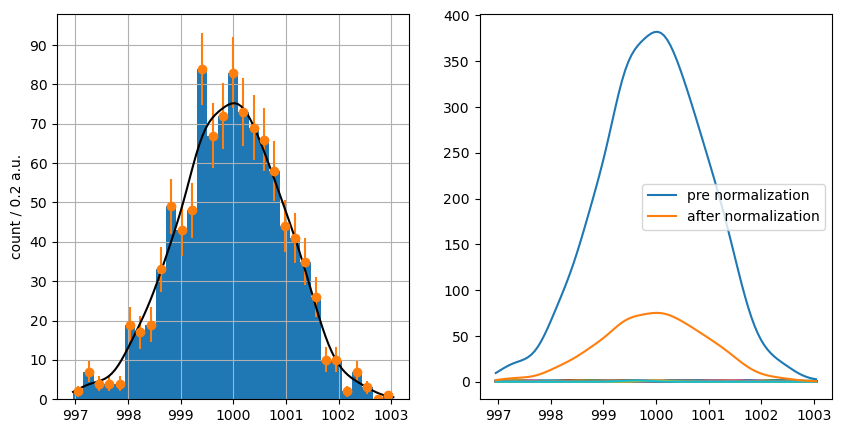

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

mu=1000
sigma=1
N=1000

x=np.random.normal(loc=mu,scale=sigma,size=N)

fig, ax = plt.subplots(1,2,figsize=(10,5))

n_bins=np.sqrt(len(x))
hist = ax[0].hist(x,bins=int(n_bins))

bin_edges=hist[1]
bin_counts=hist[0]

bin_width=bin_edges[1]-bin_edges[0]
bin_centers=bin_edges[:-1]+bin_width/2

ax[0].set_ylabel("count / {} a.u.".format(round(bin_width,2)))
y_ticks = np.arange(0,np.max(bin_counts)*1.2,int(max(bin_counts)*1.2/10))
ax[0].set_yticks(ticks=y_ticks)

ax[0].errorbar(bin_centers,bin_counts,np.sqrt(bin_counts),fmt='o')

gaussians = []
t=np.linspace(bin_edges[0],bin_edges[-1],100)
sig = 1.06*np.std(x)*len(x)**(-0.2)

for point in x:
    gaussians.append(sp.stats.norm.pdf(t,loc=point,scale=sig))

for g in gaussians:
    ax[1].plot(t,g)

gaussians = np.array(gaussians)
g_sum = np.sum(gaussians,axis=0)
ax[1].plot(t,g_sum, label="pre normalization")

I=sp.integrate.trapezoid(g_sum,t)
g_sum = g_sum*len(x)*bin_width/I
ax[1].plot(t,g_sum, label="after normalization")
ax[1].legend()
ax[0].plot(t,g_sum,color="black",label="KDE")
ax[0].grid(True)








2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2024-02-11 14:19:34--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6022:18::a27d:4212, 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6022:18::a27d:4212|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2024-02-11 14:19:35--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce896019ab80b1400964da65b87.dl.dropboxusercontent.com/cd/0/inline/CNFHk26JM_HNK07GHhEDwJT1OSZDrcqmoVH1LK5naMStT_50f4Xuzdi3UkAE-KKSDrCPrp2ehfzwSJOSphAjOelsMUmCfP17k0guqEpDllb57wrteLhzHisYd_u5jr-og7o/file# [following]
--2024-02-11 14:19:35--  https://uce896019ab80b1400964da65b87.dl.dropboxusercontent.com/

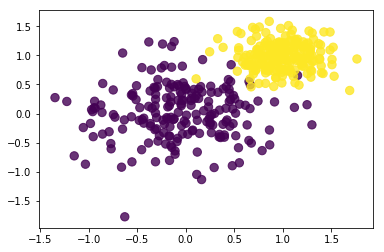

In [3]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

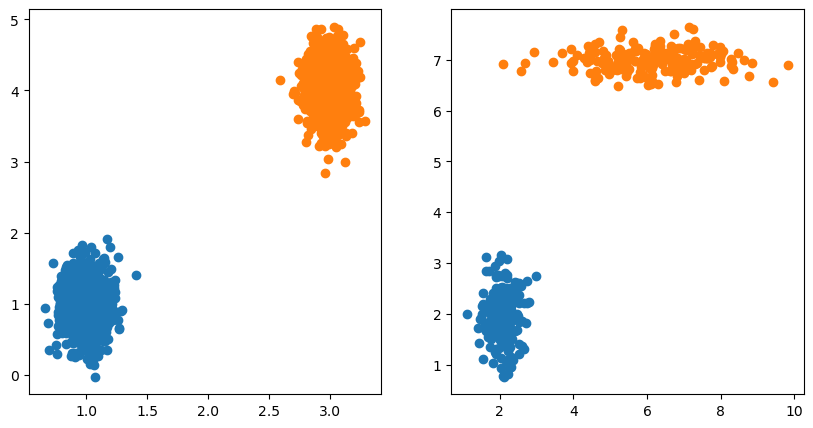

In [61]:
# 2 categories case

def gauss_2(N,mu1,mu2,sigma1,sigma2):
    x=np.random.normal(mu1,sigma1,N)
    y=np.random.normal(mu2,sigma2,N)
    return np.vstack([x,y]).T

data_1 = gauss_2(1000,1,1,0.1,0.3)
data_2 = gauss_2(1000,3,4,0.1,0.3)

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(data_1[:,0],data_1[:,1])
ax[0].scatter(data_2[:,0],data_2[:,1])

def ndim_gauss(N,mu,sig):
    if len(mu) != len(sig):
        print("error")
        return
        
    data=np.array([ np.random.normal(m,s,N) for m,s in zip(mu,sig) ])
    return data.T

d_1 = ndim_gauss(200,[2,2],[.3,.5])
d_2 = ndim_gauss(200,[6,7],[1.3,0.2])

ax[1].scatter(d_1[:,0],d_1[:,1])
ax[1].scatter(d_2[:,0],d_2[:,1])

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [96]:
# downloading the data
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2024-01-20 16:53:52--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2024-01-20 16:53:52--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd03f9def278619609122f1078a.dl.dropboxusercontent.com/cd/0/inline/CLs31ls-0r0leSgnswSW_i_gganBHKAW8uIb7QQWg1CbjnTGgctLTZmp3W7hpn2B2lr4cbM7EohyPyevRN4kXzzCLZZm3Fd_oLk3masybYT3tK6k9ZSLWPojVG4gmXrhTp4/file# [following]
--2024-01-20 16:53:53--  https://ucd03f9def278619609122f1078a.dl.dropboxusercontent.com/cd/0/inline/CLs31ls-0r0leSgnswSW_i_gganBHK

/home/nicolo/anaconda3/envs/python-lab/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nicolo/anaconda3/envs/python-lab/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<ErrorbarContainer object of 3 artists>

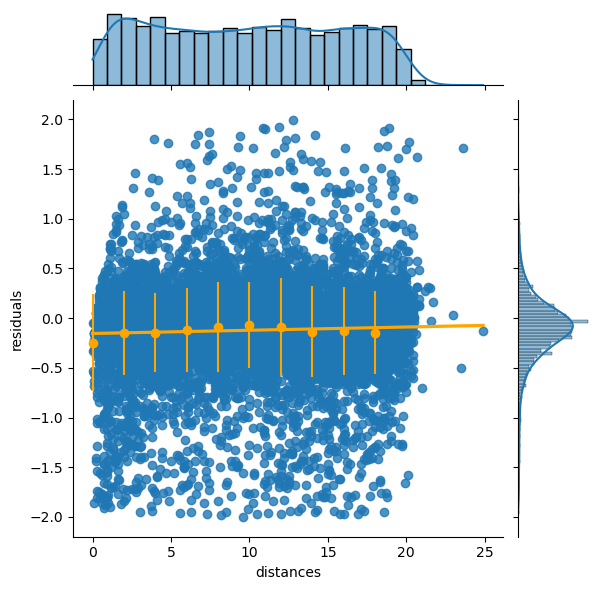

In [78]:
import seaborn as sb
import pandas as pd
import scipy as sp

df = pd.DataFrame(np.load('residuals_261.npy',allow_pickle=True).item())
df=df[abs(df["residuals"])<2]
fit = sp.stats.linregress(df["distances"],df["residuals"])
g=sb.jointplot(data=df,x="distances",y="residuals", kind='reg',line_kws={"color":"orange"})

bin_center=np.arange(0,20,2)
bin_w=bin_center[1]-bin_center[0]
mean = [df[abs(df["distances"]-c) < bin_w/2]["residuals"].mean() for c in bin_center]
err = [df[abs(df["distances"]-c) < bin_w/2]["residuals"].std() for c in bin_center]
g.ax_joint.errorbar(bin_center,mean,err,color="orange",fmt="o")
